In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.constants import codata2014 as const
%matplotlib inline 
plt.rc('axes', lw = 2)


h = const.h.cgs
c = const.c.cgs
k_B = const.k_B.cgs

## black

In [2]:
T = 20 * u.Kelvin 
nu = np.logspace(10, 13.5, 1000) * 1/u.s

In [3]:
ang_radius = 60 * u.arcsec
ang_area = (np.pi * ang_radius**2).to(u.sr)
ang_area

<Quantity 2.65828847e-07 sr>

In [4]:
def Bnu(nu, T):
    return ((2 * h * nu**3)/c**2) * 1/(np.exp((h *nu)/(k_B *T)) - 1)

In [5]:
bnu_blackbody = Bnu(nu,T) * 1/u.sr
fnu_blackbody = (bnu_blackbody * ang_area).to(u.Jy)

## dusty

In [6]:
def kappa(nu):
    kappa0 = 0.3 * u.cm**2 / u.g
    return (kappa0 * (nu/(300*u.GHz))**1.3).to(u.cm**2 / u.g)

In [7]:
Md = (0.01 * u.Msun).to(u.g)
kappa_nu = kappa(nu)

d = (160 * u.pc).to(u.cm)

In [8]:
fnu_dusty = ((Md * kappa_nu *Bnu(nu,T))/d**2).to(u.Jy)

## plot 

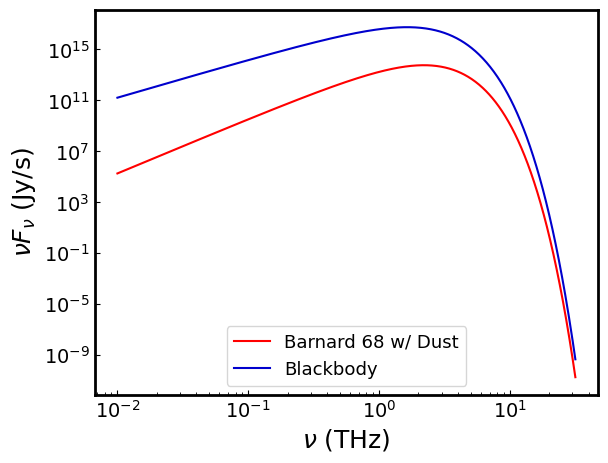

In [9]:
plt.figure(figsize = (6.5,5))
plt.plot(nu.to(u.THz), nu * fnu_dusty, color = 'red', label = 'Barnard 68 w/ Dust')
plt.plot(nu.to(u.THz), nu * fnu_blackbody, color = 'mediumblue', label = 'Blackbody')
plt.xlabel(r'$\nu$ (THz)', fontsize = 18)
plt.ylabel(r'$\nu F_\nu$ (Jy/s)', fontsize = 18)
plt.legend(loc = 'lower center', fontsize = 13)   
plt.yscale('log')
plt.xscale('log')


ax = plt.gca()
ax.minorticks_on()
ax.tick_params(which = 'both', direction = 'in', labelsize = 14)
plt.savefig('DustCurves.pdf', bbox_inches = 'tight')

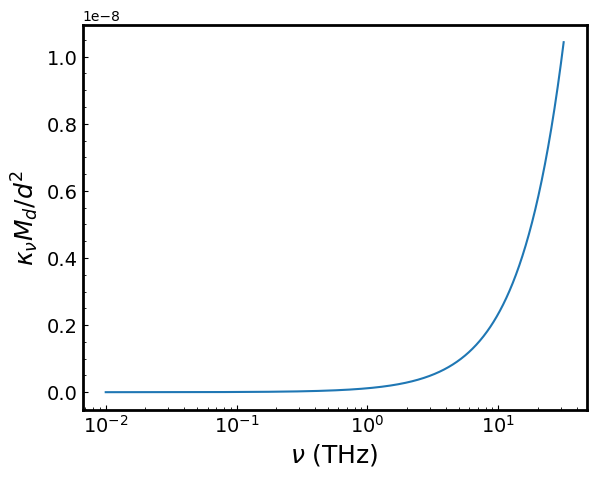

In [10]:
plt.figure(figsize = (6.5,5))
plt.plot(nu.to(u.THz), (kappa_nu* Md)/d**2)
plt.xlabel(r'$\nu$ (THz)', fontsize = 18)
plt.ylabel(r'$\kappa_\nu M_d / d^2 $', fontsize = 18)
# plt.legend(loc = 'lower center', fontsize = 13)   
# plt.yscale('log')
plt.xscale('log')


# plt.axvline(300/1000); plt.axhline(0.3)
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(which = 'both', direction = 'in', labelsize = 14)
plt.savefig('kappa.pdf', bbox_inches = 'tight')

In [11]:
nu[np.argmax(fnu_dusty)].to(u.THz)

<Quantity 1.76094481 THz>

In [12]:
nu[np.argmax(fnu_blackbody)].to(u.THz)

<Quantity 1.17644213 THz>